<a href="https://colab.research.google.com/github/Aswinramesh04/100-Days-of-DataScience/blob/main/Day63_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                Day63 DBSCAN   By: Loga Aswin

In [15]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [16]:
#load datasets
df = pd.read_csv('/content/Mall_Customers.csv')

In [28]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,-1
1,2,Male,21,15,81,0
2,3,Female,20,16,6,-1
3,4,Female,23,16,77,0
4,5,Female,31,17,40,-1


In [30]:
# checking null vallues
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Cluster                   0
dtype: int64

In [31]:
# Statistical summary
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000,1.470000
std,57.879185,13.969007,26.264721,25.823522,1.974485
min,1.000000,18.000000,15.000000,1.000000,-1.000000
25%,50.750000,28.750000,41.500000,34.750000,-1.000000
50%,100.500000,36.000000,61.500000,50.000000,2.000000
75%,150.250000,49.000000,78.000000,73.000000,3.000000
max,200.000000,70.000000,137.000000,99.000000,5.000000


**EDA - Pairplot of features**

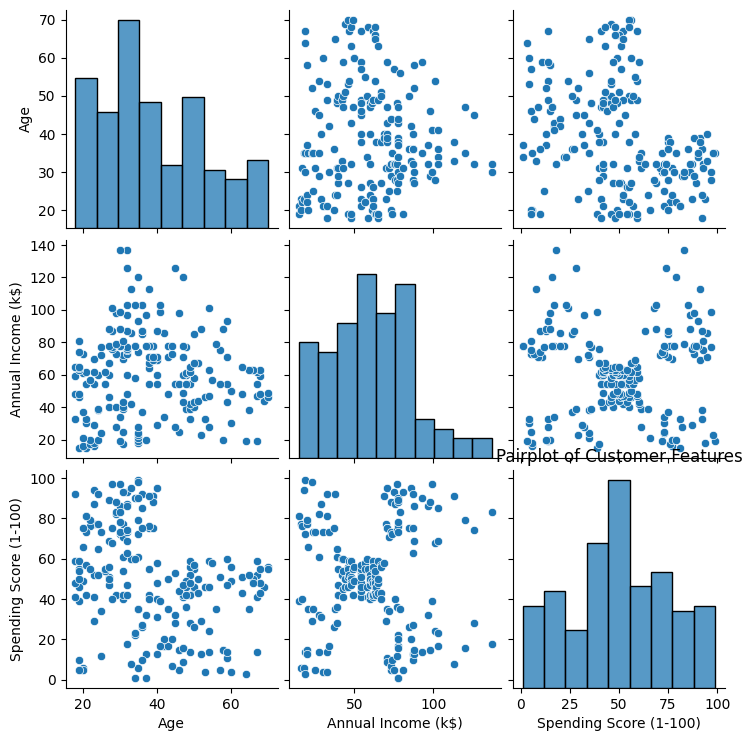

In [17]:
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.title('Pairplot of Customer Features')
plt.show()

**Selecting features for clustering and scaling**:

In [18]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Applying PCA for visualization purposes**

In [19]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

**Applying DBSCAN with custom min_samples and eps values**

In [24]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_pred = dbscan.fit_predict(X_scaled)

In [25]:
df['Cluster'] = y_pred

**Visualizing clusters using PCA**

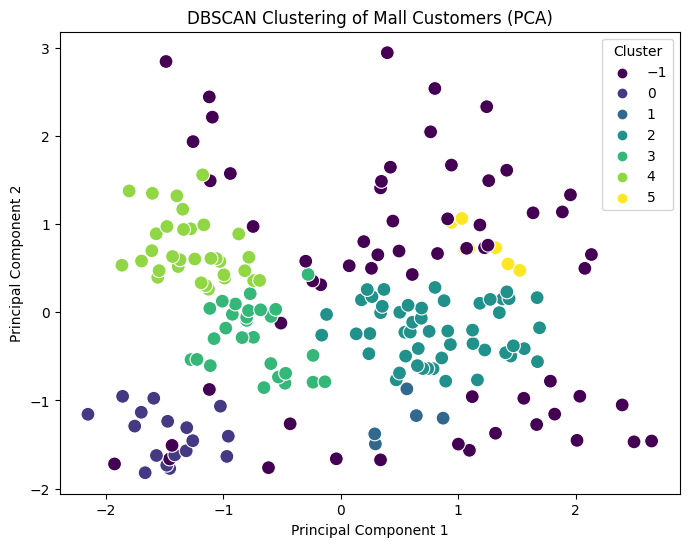

In [26]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='viridis', s=100)
plt.title('DBSCAN Clustering of Mall Customers (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', loc='upper right')
plt.show()


**Creating a heatmap for comparison of features within clusters**

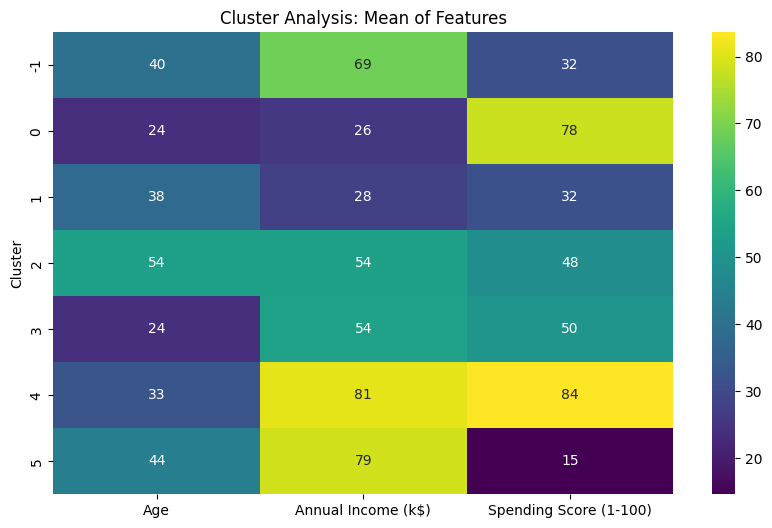

In [27]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean(), annot=True, cmap='viridis')
plt.title('Cluster Analysis: Mean of Features')
plt.show()

 Using DBSCAN on our mall_customer information, we grouped them based on how much they earn, spend, and their age.
 So,this Customer Segmentation helps us discover better ways to sell services/products and grow our business.